## Workflow of hernan-lab-to-nwb package
The purpose of this package is to read various sources and types of data and to wrangle them to the NWB format, specifically after you have collected data and before you have processed data!!! (SEE PICTURE)

Additional changes to NWB would require specific user requirements. For example, if you were to segment your calcium imaging data into ROIs, you could add ROI masks to the NWB file, but this code won't do that. 

This should be run after collecting data!

Requirements:
1. Anaconda3
2. VScode or Spyder (code written in VScode, would recommend)

Installation:
1. conda create -n decode_lab_env python=3.9
2. conda activate decode_lab_env
3. git clone https://github.com/JohnStout/hernan-lab-to-nwb 
4. cd hernan-lab-to-nwb
5. pip install - e.

<img src="/Users/js0403/hernan-lab-to-nwb/tests/idealized workflow.png" />

----
# Neuralynx
Below can be changed as needed to create your nwb files

In [7]:
import numpy as np
import pandas as pd
from hernan_lab_to_nwb.readers import ioreaders
from hernan_lab_to_nwb.utils import nwb_utils
import os

In [2]:
# Define folder path
folder_path = r'X:\01.Experiments\R21\21-12\Sessions\DA testing\2021-11-22_11-48-20' # folder path

# rats list
rats_list = [['21-12', '21-13', '21-14', '21-33', '21-15', '21-16', '21-21', '21-37'] , 
             ['21-49', '21-55', '21-48'],
             ['21-42', '21-43', '21-45'],
             ['BabyGroot', 'Meusli','Groot']]

# experiment details
experiment_details = [['Delayed Alternation BMI Experiment'],
                      ['Conditional Discrimination BMI Experiment'],
                      ['Optogenetic activation of Ventral Midline thalamus']
                      ['Simultaneous PFC tetrode recordings with thalamic and hippocampal LFPs']]

# directory  information
directory_root = [[r'X:\01.Experiments\R21'],
                     [r'X:\01.Experiments\R21'],
                     [r'X:\01.Experiments\R21'],
                     [r'X:\01.Experiments\John n Andrew\Dual optogenetics w mPFC recordings\All Subjects - DNMP\Good performance\Medial Prefrontal Cortex']]


# automated detection of metadata
ratname = folder_path.split('R21')[-1].split('\\')[1]
session = os.path.split(folder_path)[-1]
session_notes = os.path.split(os.path.split(folder_path)[0])[-1]

# automatic assignment of rats sex
if '21-12' in ratname or '21-13' in ratname or '21-14' in ratname or '21-33' in ratname or '21-49' in ratname or '21-55' in ratname:
    rats_sex = 'Female'
else:
    rats_sex = 'Male'
print("Rat:",ratname," Session:",session," Notes:",session_notes)

# metadata assignment
df = pd.DataFrame()
df['experimenter name(s)']=[['John Stout', 'Allison George', 'Suhyeong Kim', 'Henry Hallock', 'Amy Griffin']]
df['institution']=['University of Delaware']
df['lab_name']=['Griffin Lab']
df['subject_age']=['>PD90']
df['subject_description']=['Rat']
df['subject_species/genotype']=['Long Evans Rat']
df['recording_device_name']=['Digitalynx SX']
df['recording_device_description']=['Cheetah Software']
df['recording_device_manufacturer']=['Neuralynx']

# TODO: CHANGE ME
df['experiment_description']=[experiment_details[i]]
df['session_description']   =[session_notes + ' ' + session]
df['session_notes']         =[session_notes]
df['session_id']            =[session]
df['subject_id']            =[rats_list[i][ii]]
df['subject_sex']           =[rats_sex]

OS windows detected
Cite Neo https://github.com/NeuralEnsemble/python-neo/blob/master/CITATION.txt
Working with CSC
Working with TT


In [ ]:
# Read data
ephys_object = ioreaders.read_nlx(folder_path) # we first instantiate the object
ephys_object.read_ephys(opts = 'CSC') # read 

# tetrode group assignment
for i in range(len(ephys_object.csc_grouping_table['TetrodeGroup'])):
    # fill out tetrode group
    ephys_object.csc_grouping_table['TetrodeGroup'][i] = i+1
    # fill out brainregion
    if 'HPC' in ephys_object.csc_grouping_table['Name'][i]:
        ephys_object.csc_grouping_table['BrainRegion'][i] = 'HPC'
    elif 'PFC' in ephys_object.csc_grouping_table['Name'][i]:
        ephys_object.csc_grouping_table['BrainRegion'][i] = 'PFC'
        
ephys_object.csc_grouping_table

# Change this based on rat and session

# Write NWB file

In [7]:
ephys_object.write_nwb(metadata=df)

Failed to create electrode group. You may only have one channel per group.
This make take a few moments if working with a lot of CSC data...
Units not added to NWB file
Save .nwb file to:  X:\01.Experiments\R21\21-12\Sessions\DA testing\2021-11-22_11-48-20\nwbfile.nwb
Validating X:\01.Experiments\R21\21-12\Sessions\DA testing\2021-11-22_11-48-20\nwbfile.nwb against cached namespace information using namespace 'core'.
NWB validation may be incorrect. Still need an invalid NWB file to check against....10/10/2023
No errors detected in NWB file


# nwbwidgets

#### PROOF OF CONVERSION: Pynapple is lovely for loading the NWB file

In [2]:
from nwbwidgets import nwb2widget
from pynwb import NWBHDF5IO
import os
import pynapple as nap
import matplotlib.pyplot as plt

c:\Users\uggriffin\anaconda3\envs\nwb_env\lib\site-packages\traitlets\__init__.py:28: DeprecationWarning: 
            Sentinel is not a public part of the traitlets API.
            It was published by mistake, and may be removed in the future.
            
  warn(
c:\Users\uggriffin\anaconda3\envs\nwb_env\lib\site-packages\traittypes\traittypes.py:188: DeprecationWarning: metadata {'dtype': None} was set from the constructor. With traitlets 4.1, metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  super(DataFrame, self).__init__(


In [3]:
folder_path = r'X:\01.Experiments\R21\21-33\Sessions\DA testing\2022-04-21_14-02-29' # folder path
io = NWBHDF5IO(os.path.join(folder_path,'nwbfile.nwb'), mode="r")
nwbfile = io.read()    
nwb2widget(nwbfile)

nwbfile
┍━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│ Keys             │ Type        │
┝━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ trials           │ IntervalSet │
│ epochs           │ IntervalSet │
│ SpatialSeries    │ TsdFrame    │
│ ElectricalSeries │ TsdFrame    │
┕━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━┙
LFP data:
Time (s)              HPC_black    HPC_blue    HPC_green    HPC_red    PFC_blue  ...
------------------  -----------  ----------  -----------  ---------  ----------  -----
1650550145.459043       40.8325   -117.188       241.699    204.163   -19.4092   ...
1650550145.459543       66.8335   -106.384       272.827    226.318    -2.56348  ...
1650550145.4600432      74.5239   -107.117       296.265    235.657     1.83105  ...
1650550145.4605432      43.2129   -132.385       290.955    213.135   -20.6909   ...
1650550145.4610431     -16.2964   -171.387       264.954    170.654   -55.6641   ...
...
1650553752.1954181     475.159      32.959      -386.536    290.588   144.836    ...
1650553752.19591

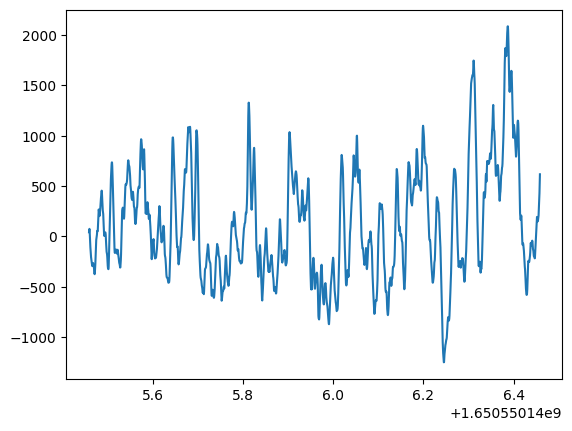

In [4]:
# load file and print output
data = nap.load_file(os.path.join(folder_path,'nwbfile.nwb'))
print(data)

# print example of LFP data
print("LFP data:")
print(data['ElectricalSeries'])

# plot signal
plt.plot(data['ElectricalSeries']['HPC_black'][0:2000])

In [6]:
data['trials']

c:\Users\uggriffin\anaconda3\envs\nwb_env\lib\site-packages\pynapple\io\interface_nwb.py:116: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data[k] = nap.IntervalSet(


,start,end
0,1.650550e+09,1.650550e+09
1,1.650550e+09,1.650550e+09
2,1.650550e+09,1.650550e+09
3,1.650550e+09,1.650550e+09
4,1.650550e+09,1.650550e+09
...,...,...
5,1.650554e+09,1.650554e+09
6,1.650554e+09,1.650554e+09
7,1.650554e+09,1.650554e+09
8,1.650554e+09,1.650554e+09
